## k-Mean (Clustering)

- Pros: Simple
- Cons:
    - Globally optimum not guarantee
    - Need to specify the number of cluster to look for
    - Linear cluster boundaries. Ineffective if the clusters have complicated geometries
    - Slow when *n_samples* grows
    - Non-probabilistic nature & Lack of flexivility in cluster shape

- Clustering: Learn from the properties of the data an optimal division of the data

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme();

X shape: (300, 2)


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Shape of the model prediction: (300,)
Shape of the cluster centers: (4, 2)


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


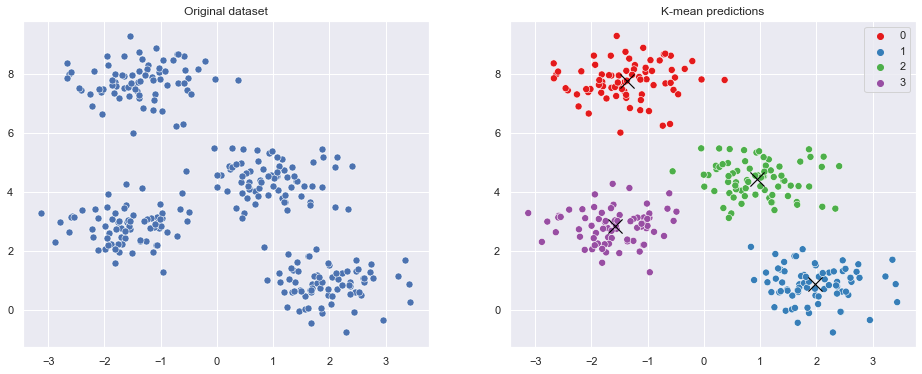

In [6]:
# K-Mean

# How does K-Mean work ?
# - "Cluster center": Mean of all the points belonging to the cluster.
# - Each point is closer to its own cluster center than to other cluser centers
# - Based on "Expectation-Maximization" approach

# 1. Guess some cluser centers
# 2. Repeat:
#       E-Step: Assign points to the nearest cluster center -> Update our cluster expectation
#       M-Step: Set the cluster centers to the mean -> Maximize some fitness function (mean)

# Generate 2D dataset with 4 clusters
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, # Number of samples from isotropic Gaussian distribution
                  centers=4, # Number of clusters
                  cluster_std=0.60, # Standard deviation
                  random_state=0)
print(f"X shape: {X.shape}")

# Visualize the dataset
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(X[:, 0], X[:, 1], s=50, ax=ax[0])
ax[0].set_title("Original dataset")

# Train k-Mean on the dataset
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,
               init='k-means++', # Strategy to select inital cluster
               )
y_model = model.fit_predict(X)
print(f"Shape of the model prediction: {y_model.shape}")
# Get the cluster centers
centers = model.cluster_centers_
print(f"Shape of the cluster centers: {centers.shape}")

# Visualize the predictions
sns.scatterplot(X[:, 0],
                X[:, 1],
                hue = y_model,
                palette = 'Set1',
                s=50,
                ax = ax[1])
sns.scatterplot(centers[:, 0],
                centers[:, 1],
                color = 'black',
                s=200,
                alpha=1,
                marker = 'x',
                ax = ax[1])

ax[1].set_title("K-mean predictions");

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

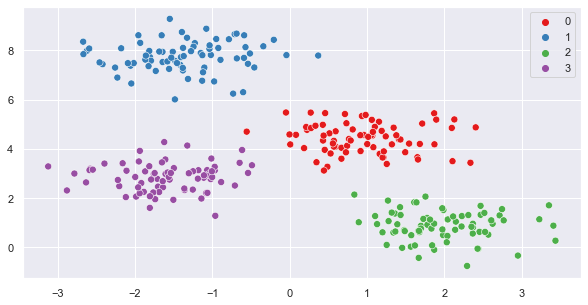

In [30]:
# Write K-mean on our own

# pairwise_distances_argmin: Compute minimal distance between 1 pont an a set of points 
from sklearn.metrics import pairwise_distances_argmin

def find_cluster(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    ##print(f"Shape of X: {X.shape}")
    rng = np.random.RandomState(rseed)
    # Randomly permute the index of the datapoints an take the n_clusters first datapoints as cluster centers
    # If X has shape (10, 2)
    # rng.permuation(10)->[5,6,2,3,9,8,1,0,4,7]->[5,6,2,3] are the index of the datapoints in X as inital cluster centers
    centers_index = rng.permutation(X.shape[0])[:n_clusters]
    centers_coordonate = X[centers_index] # Take x and y coordonate of the cluster centers
    ##print(f"Shape of centers_index: {centers_index.shape}")
    ##print(f"Shape of centers_coordonate: {centers_coordonate.shape}")
    
    while True:
        # Assign labels based on closest center
        # For each datapoint in X, return the index of the closest point in centers_coordonate
        # So label has shape (X[0], ) and values goes from 0 to n_clusters - 1
        labels = pairwise_distances_argmin(X,
                                           centers_coordonate)
        ##print(f"Shape of labels: {labels.shape}")
        ##print(f"Sample of labels: {labels[:5]}")
        
        # Find new centers from means of points
        new_centers_coordondate = np.array([X[labels == i].mean(0) # Mean of all x coord. and mean of all y coord.
                                            for i in range(n_clusters)])
        # new_centers_coordonate has shape (n_cluster, 2)
        ##print(f"Shape of new_centers: {new_centers_coordondate.shape}\n")
        
        # Check for convergence
        # Test whether all elements in centers_coordonate and new_centers_coordonate are the same
        if np.all(centers_coordonate == new_centers_coordondate):
            break
        centers_coordonate = new_centers_coordondate

    return centers_coordonate, labels

centers, labels = find_cluster(X, 4)

# Plot the K-mean clusters
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(X[:, 0], X[:, 1],
                hue=labels,
                palette = 'Set1',
                s=50,
                ax=ax)

# Warning:
# - The K-mean algorithm does NOT guarantee the globally optimal result will be reached. (try with rseed = 0)
# --> Thus, it is common for the algorithm to be run for multiple starting guesses

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

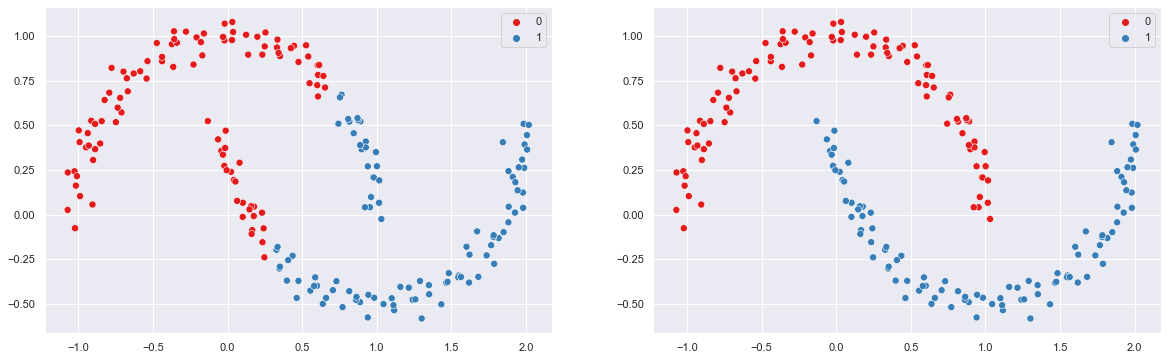

In [51]:
# k-Means limit (non-linear boundaries)

from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0) # Make datapoints as 2 half circle. X has shape(200, 2)

labels = KMeans(2, random_state=0).fit_predict(X)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.scatterplot(X[:, 0], X[:, 1],
                hue=labels,
                palette = 'Set1',
                s=50,
                ax=ax[0])

# Solution -> Similarly as SVM, we could add a 3D dimension to X such that a linear separation is possible.
# -> "kernelized K-Means": SpectralClustering

# An affinity matrix is constructed using a k-nearest neigbors connectivity matrix
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors')
labels = model.fit_predict(X)
sns.scatterplot(X[:, 0], X[:, 1],
                hue=labels,
                palette = 'Set1',
                s=50,
                ax=ax[1])


In [196]:
SpectralClustering?

Shape of data: (1797, 64)
Shape of images: (1797, 8, 8)
Model labels shape: (1797,)
True labels shape: (1797,)
Shape of cluster centers: (10, 64)
Accuracy score: 0.7935447968836951


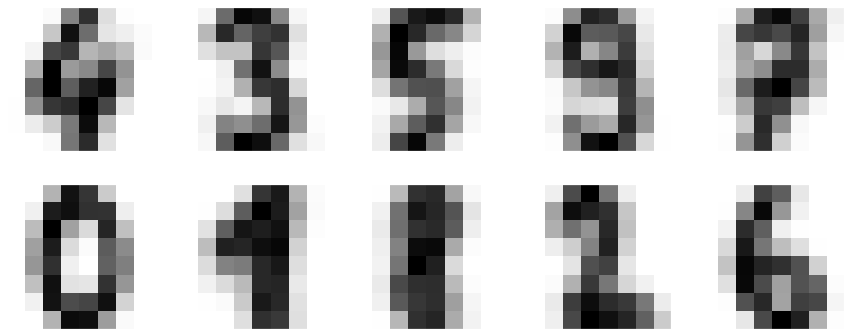

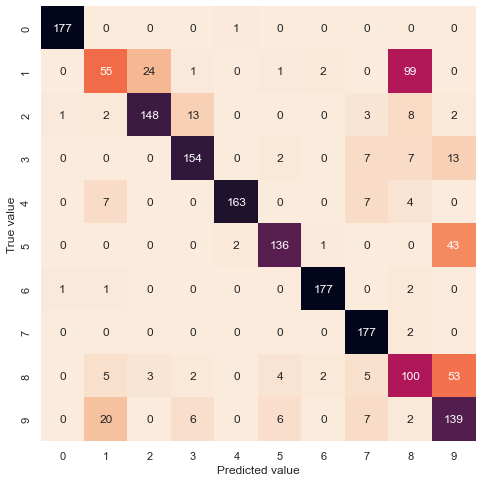

In [105]:
# Example 1:
# Digit dataset to identify similar digits without usnig the original label information

from sklearn.datasets import load_digits
digits = load_digits()
print(f"Shape of data: {digits.data.shape}")
print(f"Shape of images: {digits.images.shape}") # n_samples = 1'797, n_features = 64

# Apply K-mean
model = KMeans(n_clusters=10, random_state=0)
model_labels = model.fit_predict(digits.data)
print(f"Model labels shape: {model_labels.shape}")
print(f"True labels shape: {digits.target.shape}")

# Plot the cluster centers as images
cluster_centers = model.cluster_centers_
print(f"Shape of cluster centers: {cluster_centers.shape}")
fig, axes = plt.subplots(2, 5,
                         figsize=(15, 6),
                         subplot_kw={"xticks": [], "yticks": []})
for idx, ax in enumerate(axes.flat):
    ax.imshow(cluster_centers[idx].reshape(8, 8),
              interpolation='nearest',
              cmap='binary')
    
# -> Cluster centers are recognizable digits
# Let's assign the cluster to their right label & Evalutate the results(Conf. matrix + Accuracy score)
from scipy.stats import mode
# 
labels = np.zeros_like(model_labels) # Shape is (1'797) with 0 only
for i in range(10):
    mask = (model_labels == i)
    # Datapoints originaly assigned to label i will be re-assgined to their label
    # Compute the number that occurs most often in each cluster and assign that number number as cluster label
    labels[mask] = mode(digits.target[mask])[0]


from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(digits.target, labels)

fig, ax = plt.subplots(figsize=(8, 8))
heat_map = sns.heatmap(conf_matrix,
                        square=True,
                        annot=True,
                        cbar = False,
                        fmt = 'd',
                        xticklabels=digits.target_names,
                        yticklabels=digits.target_names,
                        cmap = sns.cm.rocket_r,
                        ax=ax)
heat_map.set(xlabel = 'Predicted value',
             ylabel = 'True value')
from sklearn.metrics import accuracy_score
print(f"Accuracy score: {accuracy_score(digits.target, labels)}")


In [116]:
# Let's apply dimension reduction before K-mean

# Manifold algorithm (t-SNE Stochastic neighbor embedding)
# t-SNE is a non-linear manifold algorihm good at preserving points within cluster
# t-SNE computes joint probabilites of datapoints in high-dim.
# and then chooses low-dim embedding which produce a similar distribution by minimizing Kullback-Leiber divergence. 

from sklearn.manifold import TSNE

print(f"Original shape of digits: {digits.data.shape}")
# Project the data (t-SNE)
tsne_model = TSNE(n_components=2,
                  init='random',# t-SNE is non-convex, so != starting point may lead to != solution
                  random_state=0)
digits_tnse = tsne_model.fit_transform(digits.data)
print(f"Projected shape of digits: {digits_tnse.data.shape}")

# Compute the clusters (K-Means)
kmean_model = KMeans(n_clusters=10,
                     random_state=0)
clusters = kmean_model.fit_predict(digits_tnse)
print(f"Shape of clusters: {clusters.shape}")

# Permute the label
labels = np.zeros_like(clusters) # labels has shape (1'797,) ranging from 0 to 9
for i in range(10):
    mask = (clusters == i)
    # Get the "true"(most frequent) label when predicted label = i
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
print(f"Accuracy of t-SNE + K-Mean: {accuracy_score(digits.target, labels)}")

Original shape of digits: (1797, 64)
Projected shape of digits: (1797, 2)
Shape of clusters: (1797,)
Accuracy of t-SNE + K-Mean: 0.9326655537006121


Shape of the data: (427, 640, 3)


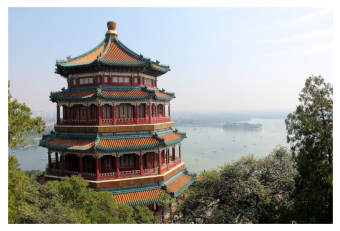

In [119]:
# Example 2:
# Color compression
# RGB images contains 256*256*256 possible colors ~16millions. Let's reduce these 16millions colors to only 16.

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
print(f"Shape of the data: {china.shape}") # RGB image, height = 427, height = 640, values range from 0 to 255.
ax = plt.axes(xticks = [], yticks= [])
ax.imshow(china);

Shape of the new data: (273280, 3)
Random pixel color shape: (10000, 3)
Shape of R: (10000,)
Shape of G: (10000,)
Shape of B: (10000,)


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


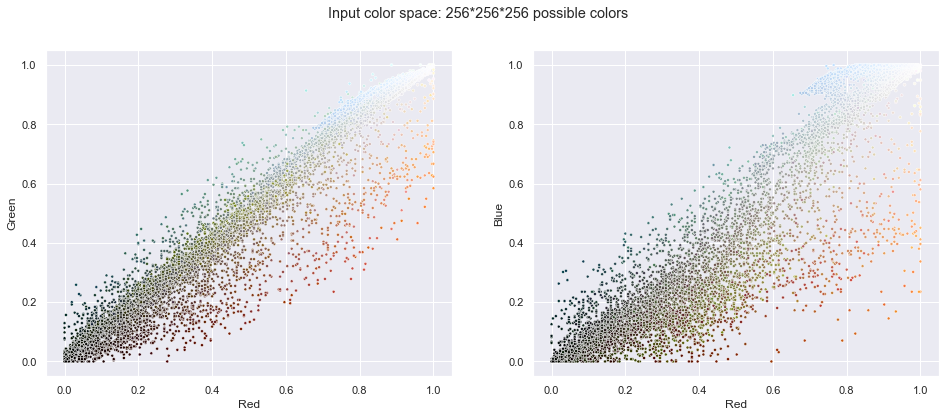

In [152]:
# Reshape pixel grid into 1D cloud of points & Normalize RBG value 
data = china / 255.0
data = data.reshape(data.shape[0]*data.shape[1], 3)
print(f"Shape of the new data: {data.shape}") # n_samples = 273'280, n_features = 3

# Visualize pixel subsets
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Choose random subset
    rng = np.random.RandomState(0)
    indexes = rng.permutation(data.shape[0])[:N] # Pick N random pixel index
    colors = colors[indexes] # Get the N random pixel RNG values
    print(f"Random pixel color shape: {colors.shape}")
    R, G, B = data[indexes].T
    print(f"Shape of R: {R.shape}") # Red value of the 10'000 random pixels in [0, 1]
    print(f"Shape of G: {G.shape}")
    print(f"Shape of B: {B.shape}")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.scatterplot(R, G, # Red and Green value of the pixels
                    c=colors, # RGB color of the pixels
                    marker='.',
                    ax=axes[0],
                       )
    axes[0].set(xlabel='Red', ylabel='Green')
    sns.scatterplot(R, B, # Red and Blue value of the pixels
                    c=colors, # RGB color of the pixels
                    marker='.',
                    ax=axes[1],
                       )
    axes[1].set(xlabel='Red', ylabel='Blue')
    
    fig.suptitle(title) # Add a centered title to the figure
    
plot_pixels(data, 'Input color space: 256*256*256 possible colors')

# -> Lets reduce the 256*256*256 possible colors to just 16 colors using k-means

Random pixel color shape: (10000, 3)
Shape of R: (10000,)
Shape of G: (10000,)
Shape of B: (10000,)


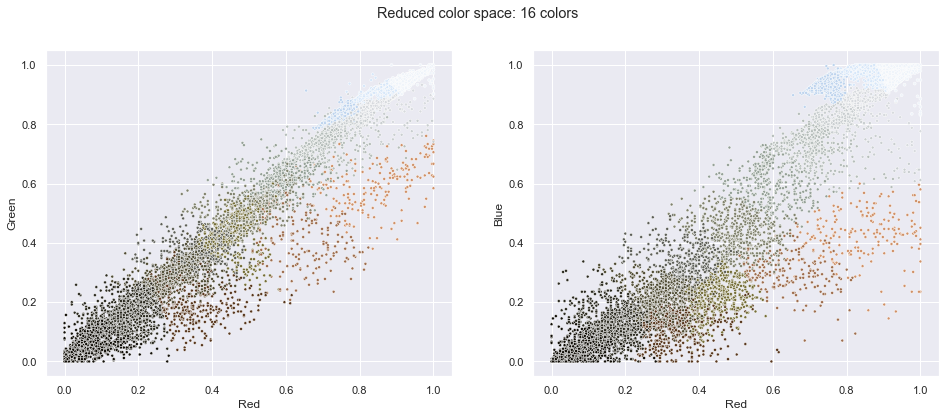

In [178]:
# Mini batch K-Mean
# Because we're dealing with very large dataset, let's use mini batch K-Mean.
# The difference is that mini batch K-Mean uses only a subset of datapoints (mini-batch)
# to update the cluser centers to speed to the operation
import warnings
warnings.simplefilter('ignore') # Fix numpy issue.

from sklearn.cluster import MiniBatchKMeans
minibatch_kmean = MiniBatchKMeans(n_clusters=16, # We want 16 colors only
                                 )
minibatch_kmean.fit(data)
# Get the clusters index into which each datapoints belongs
data_clusters = minibatch_kmean.predict(data)
# Get the cluster coordonate into which each datapoints belongs
new_colors = minibatch_kmean.cluster_centers_[data_clusters]

plot_pixels(data, colors=new_colors,
            title = "Reduced color space: 16 colors")

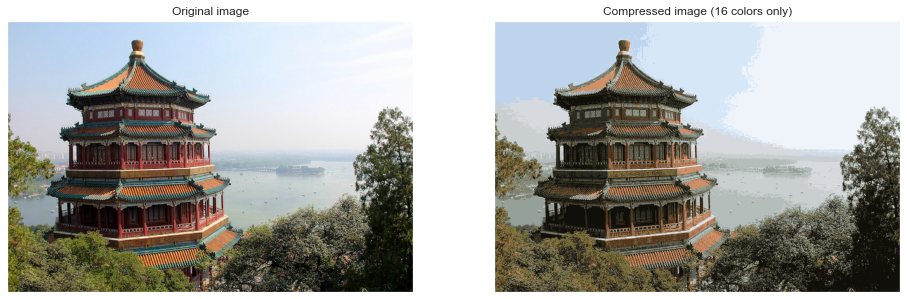

In [195]:
# Plot original images with new colors instead of original ones

data_reduced = new_colors.reshape(china.shape) # Reshape to (427, 640, 3)
fig, axes = plt.subplots(1, 2, figsize=(16, 6),
                         subplot_kw = {"xticks": [],
                                       "yticks": []})

axes[0].imshow(china)
axes[0].set_title("Original image")
axes[1].imshow(data_reduced)
axes[1].set_title("Compressed image (16 colors only)");

#### Concept Summary:

- k-Mean: Search for a given number of clusters within an unlabels multi-dimension dataset
    - "Sihouette plot" for choosing "optimal" number of clusters (based on distances between clusters datapoints)
    - Kernelized k-Mean: **Spectral K-Mean** to learn non linear cluster. An affinity matrix in construction using a k-nearest neigbors connectivity matrix
    - Images compression (16 million colors to 16 colors)


- Expectation-Maximization" approach

In [166]:
data[0]

array([0.68235294, 0.78823529, 0.90588235])